In [22]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt
import numpy as np
import os
log_dir = "../../run_logs/"


In [163]:
logs = os.listdir(log_dir)
cartpole_def, cartpole_lb, cheetah, inv_pendulum, lunar_lander, humanoid = [], [], [], [], [], []
for log in logs:
    if 'cartpole' in log:
        if 'lb' in log:
            cartpole_lb.append(log)
        else:
            cartpole_def.append(log)
    elif 'humanoid' in log:
        humanoid.append(log)
    elif 'cheetah' in log:
        cheetah.append(log)
    elif 'pendulum' in log:
        inv_pendulum.append(log)
    else:
        lunar_lander.append(log)
# cartpole_def, cartpole_lb, cheetah, inv_pendulum, lunar_lander, humanoid

In [155]:
plot_dir = '../../plots/'
def plot_single(exp, tag='Eval_AverageReturn', batch_size=None):
    reader = SummaryReader(log_dir + exp)
    df = reader.scalars
    
    df_ret = df[df['tag'] == tag]
    if batch_size == None:
        df_env_steps = df[df['tag'] == 'Train_EnvstepsSoFar']        
        plt.plot(df_env_steps['value'], df_ret['value'])
    else:
        plt.plot(df_ret['step']*batch_size, df_ret['value'])

def plot_average(exps, tag='Eval_AverageReturn', batch_size=None):
    avg_ret = None
    first = True
    for exp in exps:
        reader = SummaryReader(log_dir + exp)
        df = reader.scalars
        
        df_ret = df[df['tag'] == tag]
        if first:
            avg_ret = df_ret['value']
            first = False
        else:
            avg_ret += df_ret['value']
    avg_ret /= len(exps)
    if batch_size == None:
        df_env_steps = df[df['tag'] == 'Train_EnvstepsSoFar']        
        plt.plot(df_env_steps['value'], df_ret['value'])
    else:
        plt.plot(df_ret['step']*batch_size, df_ret['value'])

def plot_experiments(
    log_list, x_title='Environment Iterations',
    y_title='Eval_AverageReturn', title='Learning Curve',
    tag = 'Eval_AverageReturn',
    batch_size=None, legend=None, mode=None
):
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    
    if mode=='avg':
        hyperparam_set, def_set = [], []
        for exp in log_list:
            if '.DS' not in exp:
                print(exp, '2000' in exp)
                if '2000' in exp:
                    hyperparam_set.append(exp)
                else:
                    def_set.append(exp)
        plot_average(def_set, tag=tag, batch_size=batch_size)
        plot_average(hyperparam_set, tag=tag, batch_size=batch_size)
                
    else:
        for exp in log_list:
            if '.DS' not in exp:
                plot_single(exp, tag=tag, batch_size=batch_size)
        
    if legend:
        plt.legend(legend)
    
    plt.savefig(fname=plot_dir+title)
    plt.show()


['q2_pg_cartpole_CartPole-v0_26-09-2023_23-45-57', 'q2_pg_cartpole_na_CartPole-v0_26-09-2023_09-36-32', 'q2_pg_cartpole_rtg_na_CartPole-v0_26-09-2023_09-43-21', 'q2_pg_cartpole_rtg_CartPole-v0_26-09-2023_09-35-30']


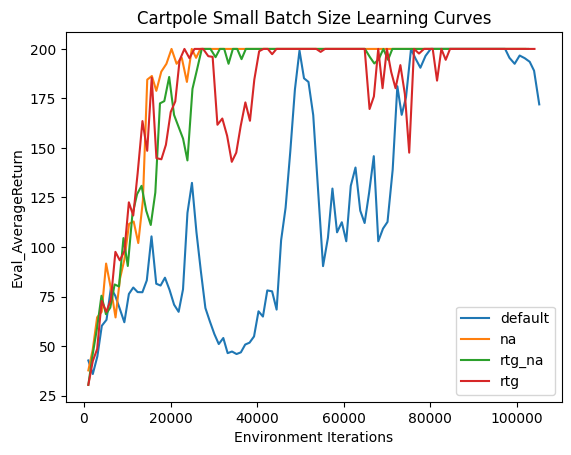

In [156]:
print(cartpole_def)
plot_experiments(cartpole_def, 
                 title='Cartpole Small Batch Size Learning Curves',
                 legend=['default', 'na', 'rtg_na', 'rtg']
)

['q2_pg_cartpole_lb_rtg_CartPole-v0_26-09-2023_23-46-49', 'q2_pg_cartpole_lb_CartPole-v0_26-09-2023_23-46-40', 'q2_pg_cartpole_lb_rtg_na_CartPole-v0_26-09-2023_23-47-05', 'q2_pg_cartpole_lb_na_CartPole-v0_26-09-2023_23-46-58']


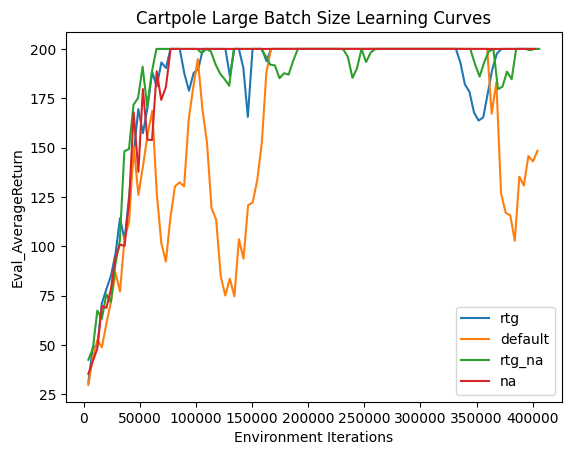

In [157]:
print(cartpole_lb)
plot_experiments(cartpole_lb, 
                 title='Cartpole Large Batch Size Learning Curves',
                 legend=['rtg', 'default', 'rtg_na', 'na']
)

['q2_pg_cheetah_baseline_bgs_HalfCheetah-v4_27-09-2023_16-59-00', 'q2_pg_cheetah_HalfCheetah-v4_27-09-2023_14-57-20', 'q2_pg_cheetah_baseline_HalfCheetah-v4_27-09-2023_00-18-53']


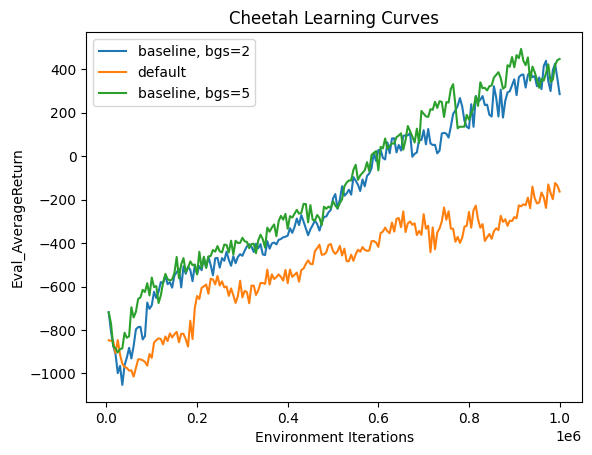

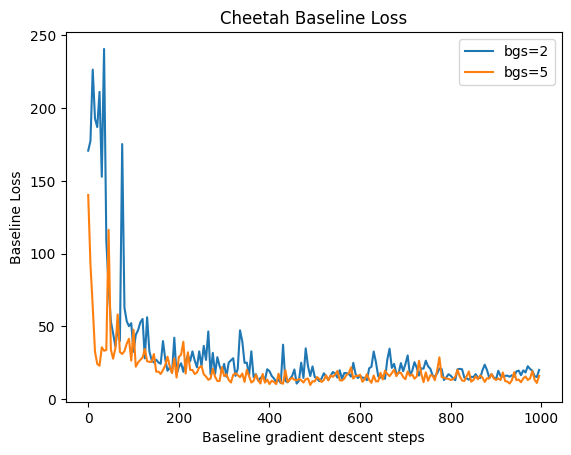

In [167]:
print(cheetah)
plot_experiments(cheetah, 
                 title='Cheetah Learning Curves',
                 legend=['baseline, bgs=2', 'default', 'baseline, bgs=5']
)
plot_experiments([cheetah[0], cheetah[2]], 
                 title='Cheetah Baseline Loss',
                 batch_size=5,
                 tag='Baseline_Loss',
                 x_title='Baseline gradient descent steps',
                 y_title='Baseline Loss',
                 legend=['bgs=2', 'bgs=5']
)

['q2_pg_lunar_lander_lambda_95_LunarLander-v2_26-09-2023_09-40-05', '.DS_Store', 'q2_pg_lunar_lander_lambda_0_LunarLander-v2_26-09-2023_09-39-47', 'q2_pg_lunar_lander_lambda_1_LunarLander-v2_26-09-2023_09-39-51', 'q2_pg_lunar_lander_lambda_99_LunarLander-v2_26-09-2023_09-39-58', 'q2_pg_lunar_lander_lambda_98_LunarLander-v2_26-09-2023_09-39-44']


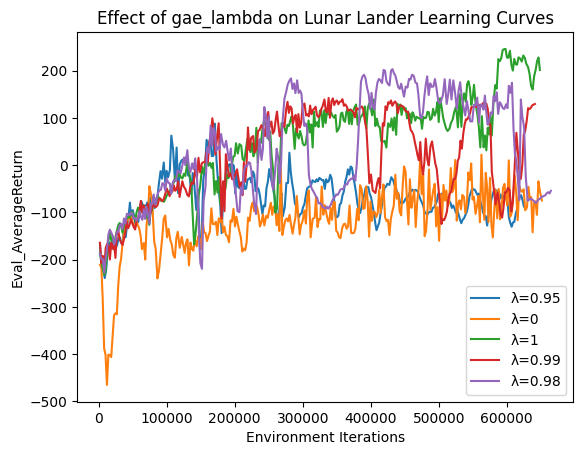

In [159]:
print(lunar_lander)
plot_experiments(lunar_lander, 
                 title='Effect of gae_lambda on Lunar Lander Learning Curves',
                 legend=['λ=0.95', 'λ=0', 'λ=1', 'λ=0.99', 'λ=0.98']
)

['q2_pg_pendulum_default_s1_InvertedPendulum-v4_26-09-2023_09-37-07', 'q2_pg_pendulum_b_2000_s2_InvertedPendulum-v4_27-09-2023_15-10-14', 'q2_pg_pendulum_b_2000_s1_InvertedPendulum-v4_27-09-2023_15-08-10', 'q2_pg_pendulum_b_2000_s4_InvertedPendulum-v4_27-09-2023_15-13-32', 'q2_pg_pendulum_default_s3_InvertedPendulum-v4_26-09-2023_09-41-51', 'q2_pg_pendulum_default_s2_InvertedPendulum-v4_26-09-2023_09-39-06', 'q2_pg_pendulum_b_2000_s5_InvertedPendulum-v4_27-09-2023_15-15-05', 'q2_pg_pendulum_default_s4_InvertedPendulum-v4_26-09-2023_09-44-31', 'q2_pg_pendulum_b_2000_s3_InvertedPendulum-v4_27-09-2023_15-11-56', 'q2_pg_pendulum_default_s5_InvertedPendulum-v4_26-09-2023_09-46-35']
q2_pg_pendulum_default_s1_InvertedPendulum-v4_26-09-2023_09-37-07 False
q2_pg_pendulum_b_2000_s2_InvertedPendulum-v4_27-09-2023_15-10-14 True
q2_pg_pendulum_b_2000_s1_InvertedPendulum-v4_27-09-2023_15-08-10 True
q2_pg_pendulum_b_2000_s4_InvertedPendulum-v4_27-09-2023_15-13-32 True
q2_pg_pendulum_default_s3_Invert

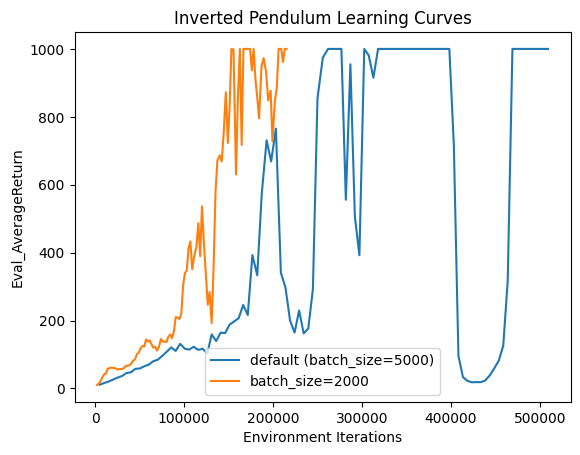

In [168]:
print(inv_pendulum)
plot_experiments(inv_pendulum, 
                 title='Inverted Pendulum Learning Curves',
                 legend=['default (batch_size=5000)', 'batch_size=2000'],
                 mode='avg'
)

['q2_pg_humanoid_stripped']


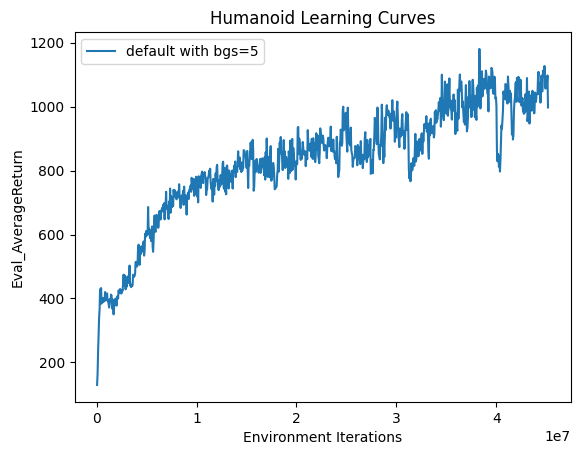

In [165]:
print(humanoid)
plot_experiments(humanoid, 
                 title='Humanoid Learning Curves',
                 legend=['default with bgs=5'],
)

In [182]:
x_val = np.arange(0.001, 0.999, 0.0001)
n = [(4*x**2+8*x+1)/((1-x**4)*x) for x in x_val]
r = [(x**2+3*x+1)/((1-x**4)*x) for x in x_val]

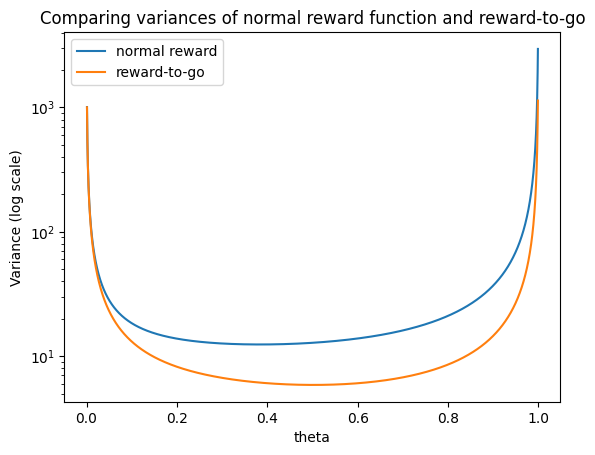

In [188]:
plt.plot(x_val, n)
plt.plot(x_val, r)
plt.yscale('log')
plt.title('Comparing variances of normal reward function and reward-to-go')
plt.xlabel('theta')
plt.ylabel('Variance (log scale)')
plt.legend(['normal reward', 'reward-to-go'])
plt.savefig(plot_dir+'variance_plot')